In [1]:
# load MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
print(train_images[0].shape)
print(train_images[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

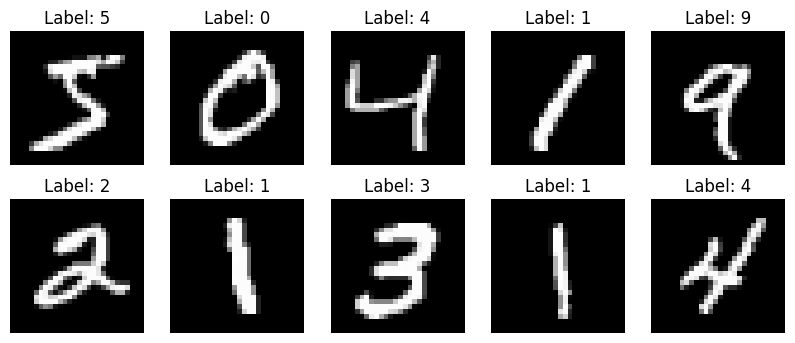

In [3]:
 #Display the first 10 images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis('off')


In [4]:
train_labels[0:10 ]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# there is one chanel i  gray scale images
# reshape to number of samples, height, width, and number of channels.
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

represent categorical data with one-hot encoding. it converts categorical data into a binary matrix, where each category is represented by a unique binary code.

In [6]:
print(train_labels[3])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[3])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


split dataset for training and test sets

In [7]:
# Split training data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)


(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


## Builds the Convolutional Neural Network (CNN) model

In [9]:
#Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/5
750/750 [==============================] - 48s 63ms/step - loss: 0.2141 - accuracy: 0.9351 - val_loss: 0.0691 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 3/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9891
Epoch 5/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0452 - val_accuracy: 0.9867


In [12]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 [==============================] - 2s 8ms/step - loss: 0.0340 - accuracy: 0.9885
Test accuracy: 0.9884999990463257


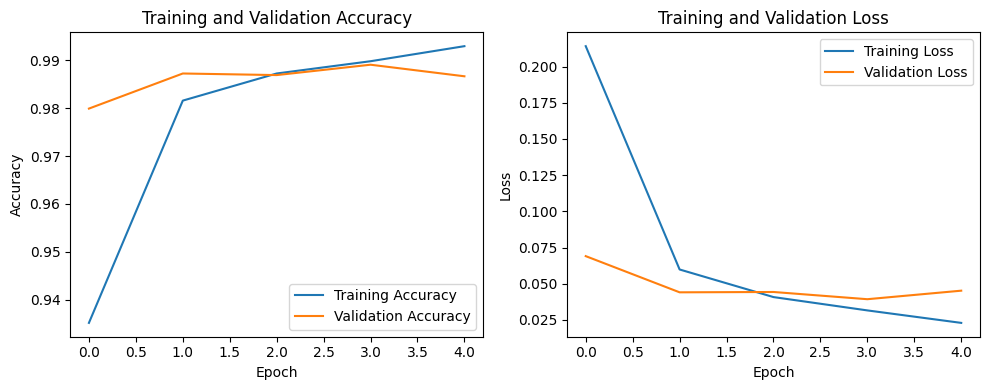

In [13]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Hyperparameters tuning

In [14]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.4 MB/s eta 0:00:00


In [16]:

# Save the trained model
model.save('mnist_cnn_model.h5')

Obtain 10 random samples from mnist dataset ,  inference and display actual vs prediction and accouracy

1/1 [==============================] - 0s 85ms/step


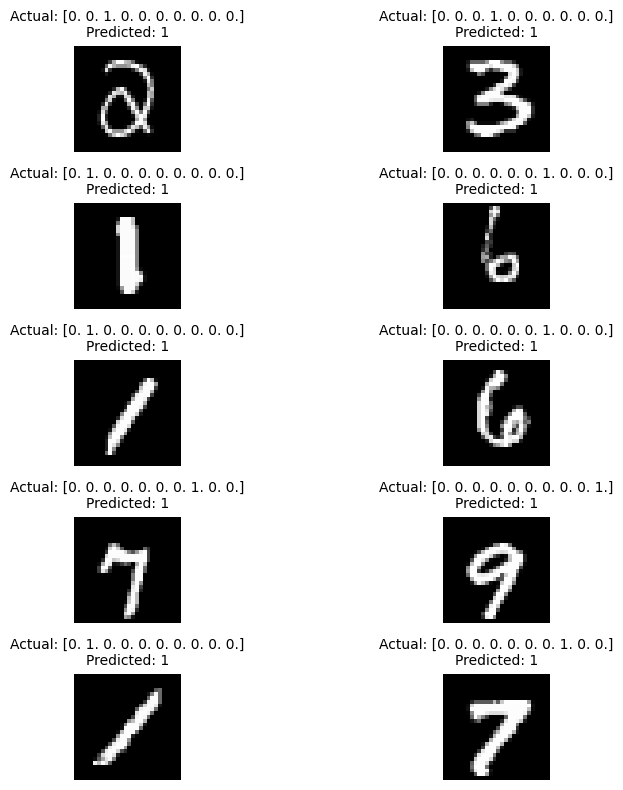

Accuracy: 10.00%


In [23]:
from keras.models import load_model

# Load the trained model
model = load_model('mnist_cnn_model.h5')

ns=10
sp=int(ns/2)
# Select 10 random samples
random_indices = np.random.choice(test_images.shape[0], size=ns, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Preprocess the data
sample_images = sample_images.reshape((ns, 28, 28, 1)).astype('float32') / 255

# Perform inference
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display actual vs. predicted labels and accuracy
plt.figure(figsize=(ns, 8))
for i in range(ns):
    plt.subplot(sp, 2, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Actual: {sample_labels[i]}\nPredicted: {predicted_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = np.mean(np.equal(sample_labels, predicted_labels))
print(f"Accuracy: {accuracy * 100:.2f}%")




